#  Homework 2


**Due Date: ** Friday, Febrary 9th, 2017 at 10am

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Problem 1: Monte Carlo Integration

Let $X$ be a random variable with distribution described by the following pdf:

$$
f_X(x) = \begin{cases}
\frac{1}{12}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9), &7< x\leq 9\\
0, &otherwise
\end{cases}
$$

Let $h$ be the following function of $X$:

$$
h(X) = \frac{1}{3\sqrt{2}\pi}\mathrm{exp}\left\{ -\frac{1}{18}\left( X - 5\right)^2\right\}
$$

Compute $\mathbb{E}[h(X)]$ via Monte Carlo simulation using the following sampling methods:
- inverse transform sampling
- rejection sampling with both uniform proposal distribution and normal proposal distribution (steroids) (with appropriately chosen parameters)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Inverse Sampling

In [4]:
# define the pdf to visualize and use later
def pdf(x):
    if x< 1:
        return 0
    elif 1<=x<=3:
        return x/12-1/12
    elif 3 < x<= 5:
        return -x/12 +5/12
    elif 5<x<=7:
        return x/6-5/6
    elif 7 <x<=9:
        return -x/6+3/2
    else:
        return 0

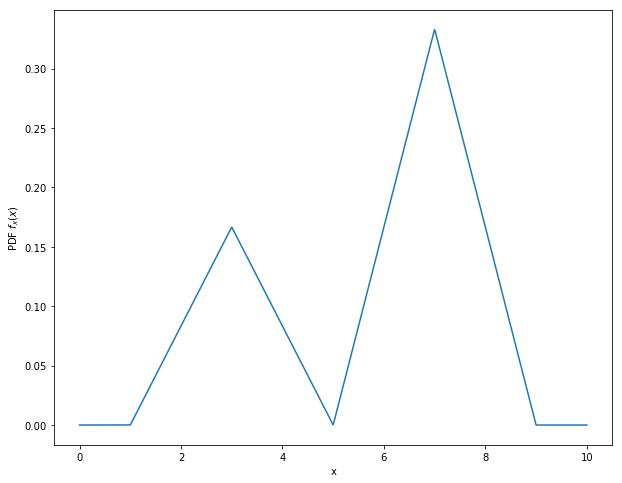

In [5]:
xvals = np.linspace(0,10,1000)
pdfvals = []
for i in range(len(xvals)):
    pdfvals.append(pdf(xvals[i]))
plt.figure(figsize=(10,8))
plt.plot(xvals,pdfvals)
plt.xlabel('x')
plt.ylabel(r'PDF $f_x(x)$')

In [6]:
#check normalization
print('the integral of the pdf = %s' %np.trapz(pdfvals,xvals))

the integral of the pdf = 0.999998997997


Lets find the CDF of f:

integrals in each range 

$$= \begin{cases}
(x^2/24-x/12 -1/24+1/12), &1\leq x\leq 3\\
-x^2/24+5x/12 +9/24-15/12, &3< x\leq 5\\
x^2/12-5x/6 -25/12+25/6, &5< x\leq 7\\
-x^2/12+3x/2 +49/12-21/2, &7< x\leq 9\\
0, &otherwise
\end{cases}
$$

Now we need to add the first integral(evaluated at 3) to the second integral. The first (at 3) and second integral (at 5) to the third and so on. Therefore:


$$ F_X(x)= \begin{cases}
0,                             & x<1 \\
(x^2/24-x/12 -1/24+1/12), &1\leq x\leq 3\\
-x^2/24+5x/12 +17/24-17/12, &3< x\leq 5\\
x^2/12-5x/6 +29/12, &5< x\leq 7\\
-x^2/12 + 3x/2 -23/4, &7< x\leq 9\\
1, &x>9
\end{cases}
$$

In [7]:
# define the cdf as above and visualize
def CDF(x):
    if x< 1:
        return 0
    elif 1<=x<=3:
        return x**2/24 - x/12 -1/24 + 1/12
    elif 3 < x<= 5:
        return -x**2/24+5*x/12 +17/24-17/12
    elif 5<x<=7:
        return x**2/12 -5*x/6 +29/12
    elif 7 <x<=9:
        return -x**2/12 +3*x/2 -23/4
    else:
        return 1

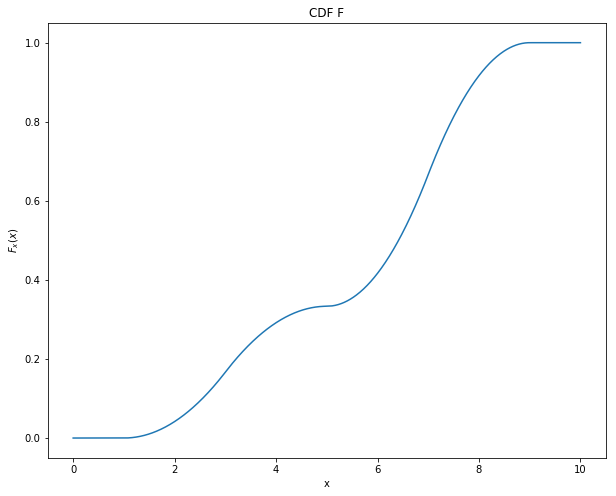

In [9]:
xvals = np.linspace(0,10,1000)
cdfvals = []
for i in range(len(xvals)):
    cdfvals.append(CDF(xvals[i]))
plt.figure(figsize=(10,8))
plt.plot(xvals,cdfvals)
plt.xlabel('x')
plt.ylabel(u'$F_{x}(x)$')
plt.title('CDF F')

To avoid the messy algebra of inverting quadratic functions i simply used wolfram alpha to invert the functions and chose the right sign to make sure the inversion was right for the region.

$$ invF_X(x)= \begin{cases}
1+2\sqrt{6y}, &0\leq y\leq 1/6\\
5-2\sqrt{2}\sqrt{1-3y}, &1/6 < y\leq 1/3\\
5+2\sqrt{3y-1}, &1/3< y\leq 2/3\\
9-2\sqrt{3}\sqrt{1-y}, &2/3< y\leq 1\\
\end{cases}
$$

##### Inverse sampling
Now that we have our inverse CDF we can sample from our distribution!

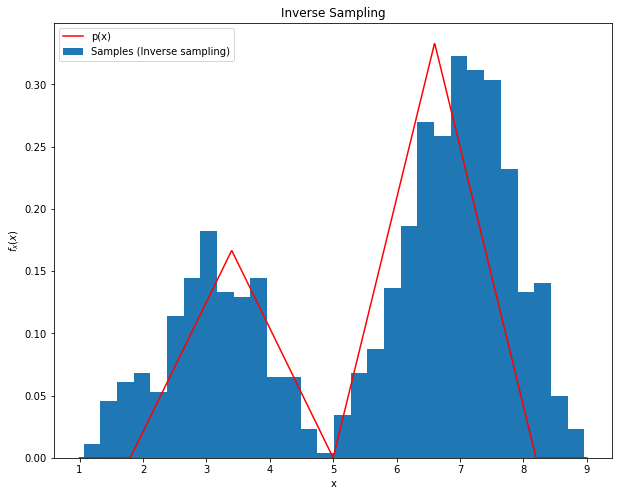

In [21]:
# inverse sampling
# code adapted from inverse sampling section of Rahul's notes
def invfx(y):
    if 0 <= y <= 1/6:
        return 1+2*np.sqrt(6*y)
    elif 1/6<y<=1/3:
        return 5-2*np.sqrt(2*(1-3*y))
    elif 1/3<y<=2/3:
        return 5+2*np.sqrt(3*y-1)
    else:
        return 9-2*np.sqrt(3*(1-y))

# 1000 samples
N = 1000
R = np.random.uniform(0, 1, N)
xs = []
for i in range(len(R)):
    xs.append(invfx(R[i]))

plt.figure(figsize=(10,8))
# plot the histogram
plt.hist(xs,bins=30,normed='True', label=u'Samples (Inverse sampling)');

# plot our (normalized) function
plt.plot(xvals, pdfvals, 'r', label=u'p(x)')
plt.xlabel('x')
plt.title('Inverse Sampling')
plt.ylabel(r'$f_x(x)$')
# turn on the legend
plt.legend()

We can see that inverse sampling does a pretty good job of modeling our pdf

Now, with the sample data we want to evaluate h(x). In the plot below we vary the number of samples and plot the E[h(x)] using MC vs the np.trapz integral to get a sense of the variance along the samples dimension. (I later do the same procedure along the replication dimension to get the sampling distribution of the integral)

In [11]:
def h(x):
    return (1/(3*np.sqrt(2)*np.pi))*np.exp(-((x-5)**2)/18)

actual integral = 0.0588582637083


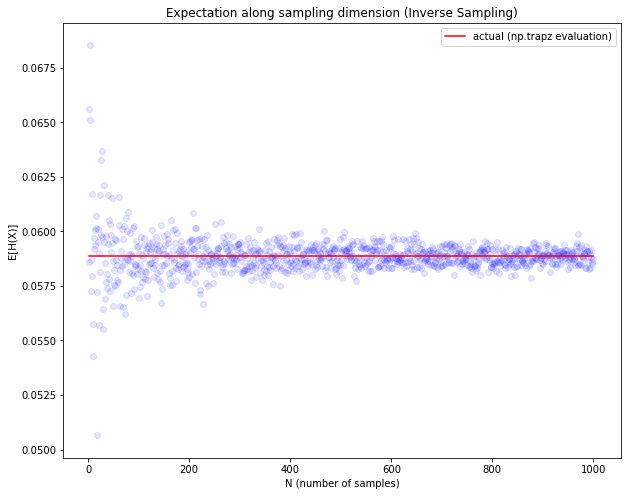

In [25]:
plt.figure(figsize=(10,8))
xvals = np.linspace(1,9,1000)
act_density = []
# find the real integral (numerically)
for i in range(len(xvals)):
    act_density.append(pdf(xvals[i])*h(xvals[i]))
actual_int = np.trapz(act_density,xvals)
print('actual integral = ' + str(actual_int))
# find the integral using inverse sampling
for n in np.arange(1,1000):
    R = np.random.uniform(0, 1,n)
    xs = []
    for i in range(len(R)):
        xs.append(invfx(R[i]))
    xs = np.array(xs)
    plt.scatter(n,np.sum(h(xs))/n,c='b',alpha=0.1)

plt.plot(np.arange(1,1000),actual_int*np.ones(999),c='r',label='actual (np.trapz evaluation)')
plt.legend()
plt.title('Expectation along sampling dimension (Inverse Sampling)')
plt.xlabel('N (number of samples)')
plt.ylabel('E[H(X)]')

In [26]:
print('1000 samples yields an expectation of: %s' %(np.sum(h(xs))/n))

1000 samples yields an expectation of: 0.0587484437082


## Rejection Sampling

Now we want to carry out a similar procedure for rejection sampling

#### Uniform Proposal

Count 2763 Accepted 1000


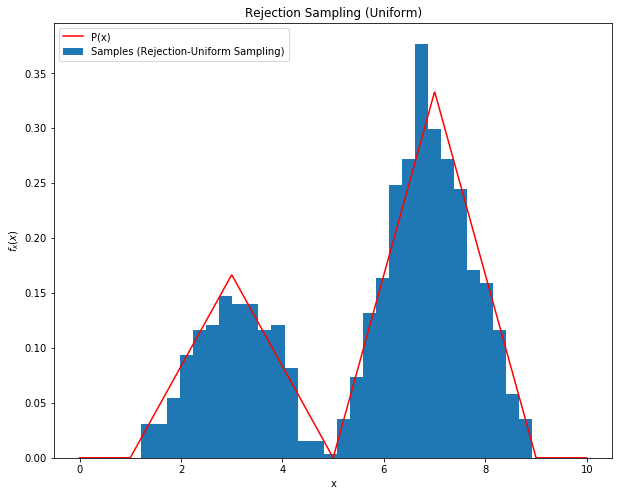

In [27]:
# code adapted from Rahul's lecture slides
xmin = 1 # the lower limit of our domain
xmax = 9 # the upper limit of our domain

# range limit (supremum) for y
ymax = 0.35
#you might have to do an optimization to find this.

N = 1000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    # pick a uniform number on [xmin, xmax) (e.g. 0...10)
    x = np.random.uniform(xmin, xmax)
    
    # pick a uniform number on [0, ymax)
    y = np.random.uniform(0,ymax)
    
    # Do the accept/reject comparison
    if y < pdf(x):
        samples[accepted] = x
        accepted += 1
    
    count +=1
    
print("Count",count, "Accepted", accepted)

plt.figure(figsize=(10,8))
# plot the histogram
plt.hist(samples,bins=30,normed=True, label=u'Samples (Rejection-Uniform Sampling)');
xvals = np.linspace(0,10,1000)
# plot our (normalized) function
plt.plot(xvals, pdfvals, 'r', label=u'P(x)')
plt.xlabel('x')
plt.ylabel(r'$f_x(x)$')
plt.title('Rejection Sampling (Uniform)')
# turn on the legend
plt.legend();

actual integral = 0.0588582637083


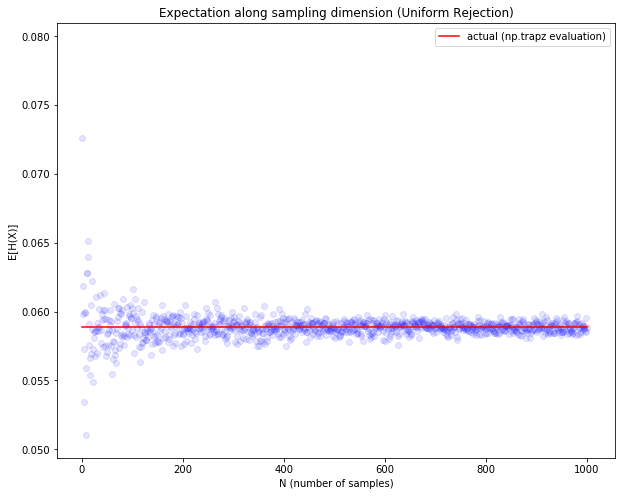

In [28]:
plt.figure(figsize=(10,8))
xvals = np.linspace(1,9,1000)
act_density = []
# find the real integral (numerically)
for i in range(len(xvals)):
    act_density.append(pdf(xvals[i])*h(xvals[i]))
actual_int = np.trapz(act_density,xvals)
print('actual integral = ' + str(actual_int))
# find the integral using rejection (uniform)
for n in np.arange(1,1000):
    xmin = 1 # the lower limit of our domain
    xmax = 9 # the upper limit of our domain

    # range limit (supremum) for y
    ymax = 0.35
    #you might have to do an optimization to find this.

    N = n # the total of samples we wish to generate
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)
    count = 0 # the total count of proposals

    # generation loop
    while (accepted < N):

        # pick a uniform number on [xmin, xmax) (e.g. 0...10)
        x = np.random.uniform(xmin, xmax)

        # pick a uniform number on [0, ymax)
        y = np.random.uniform(0,ymax)

        # Do the accept/reject comparison
        if y < pdf(x):
            samples[accepted] = x
            accepted += 1
    
    plt.scatter(n,np.sum(h(samples))/n,c='b',alpha=0.1)

plt.plot(np.arange(1,1000),actual_int*np.ones(999),c='r',label='actual (np.trapz evaluation)')
plt.legend()
plt.title('Expectation along sampling dimension (Uniform Rejection)')
plt.xlabel('N (number of samples)')
plt.ylabel('E[H(X)]')

In [29]:
print('1000 samples yields an expectation of: %s' %(np.sum(h(samples))/1000))

1000 samples yields an expectation of: 0.0587264107415


#### Normal Proposal

Now we have a sense for how to sample from the inverse CDF and using rejection sampling with a uniform. We have also seen how these vary along the sampling dimension in our particular case. Now we move to rejection sampling on steroids!

The first thing we want to do is find a gaussian(and the respective M value) that encompass our pdf. As an estimate, I assume the mean of the gaussian is the center of the two triangles so $\mu = 5$, it looks like the gaussian would have a std of $ \sigma = 2$. Note: I played around more with the mean and sigma to make sure M is as close to 1 to ensure rejection rate is low.

In [81]:
# finding M
from scipy.stats import norm
xvals = np.linspace(1,9,1000)
mvals = []
fv = []
gv = []
for i in range(len(xvals)):
    fvals=(pdf(xvals[i]))
    fv.append(fvals)
    gvals=(norm.pdf(xvals[i],5.5,2.3))
    gv.append(gvals)
    mvals.append(fvals/gvals)
fv = np.array(fv)
gv = np.array(gv)
print('M = %s'%max(mvals))

M = 2.37405553418


In [82]:
M = max(mvals)

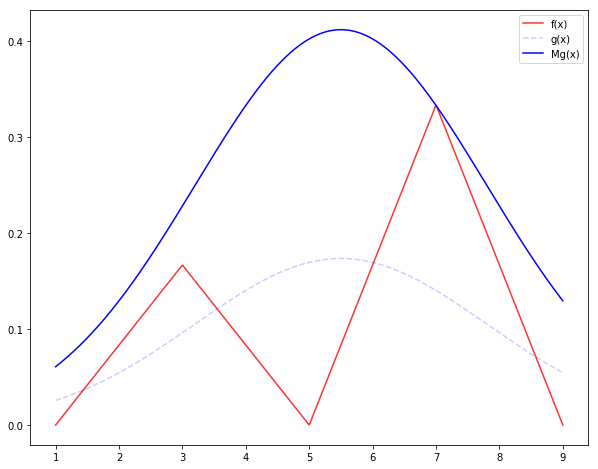

In [83]:
plt.figure(figsize=(10,8))
plt.plot(xvals,fv,c='r',label='f(x)',alpha=.8)
plt.plot(xvals,gv,c='b',label='g(x)',linestyle='--',alpha=0.2)
plt.plot(xvals,gv*M,c='b',label='Mg(x)')
plt.legend()

Count 2413 Accepted 1000


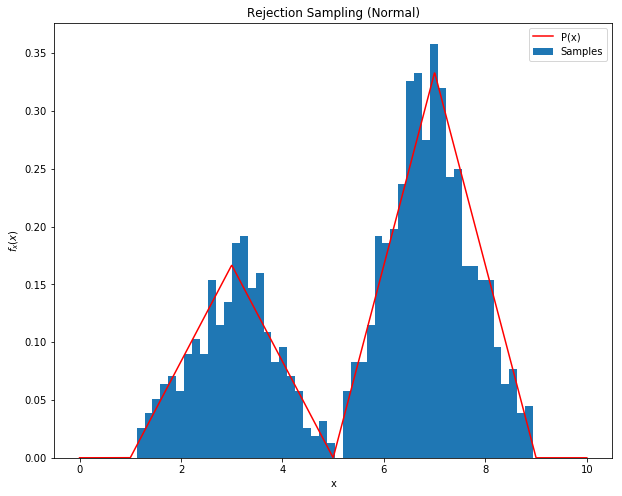

In [91]:
# domain limits
xmin = 1# the lower limit of our domain
xmax = 9 # the upper limit of our domain
mu, std = 5.5,2.3

N = 1000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    # Sample from g using inverse sampling
    xproposal = np.random.normal(mu,std)
    
    # pick a uniform number on [0, 1)
    y = np.random.uniform(0,1)
    
    # Do the accept/reject comparison
    if y < pdf(xproposal)/(M*(norm.pdf(xproposal,mu,std))):
        samples[accepted] = xproposal
        accepted += 1
    
    count +=1
    
print("Count", count, "Accepted", accepted)

# get the histogram info
hinfo = np.histogram(samples,50)
plt.figure(figsize=(10,8))
# plot the histogram
plt.hist(samples,bins=50, normed = True,label=u'Samples');

xvals = np.linspace(0,10,1000)
# plot our (normalized) function
plt.plot(xvals, pdfvals, 'r', label=u'P(x)')
plt.xlabel('x')
plt.ylabel(r'$f_x(x)$')
plt.title('Rejection Sampling (Normal)')
# turn on the legend
plt.legend();


actual integral = 0.0588582637083


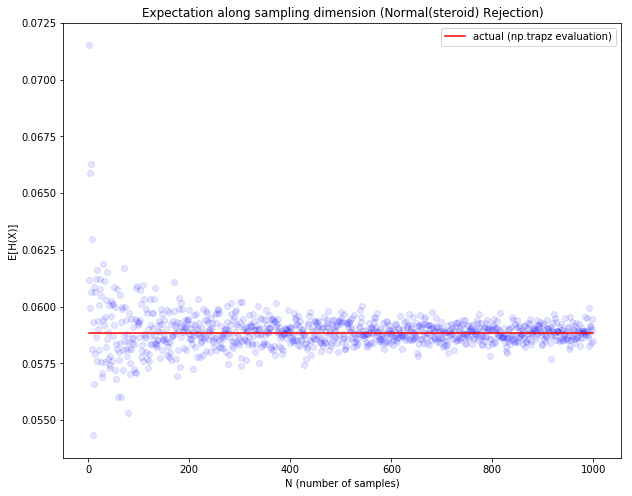

In [94]:
plt.figure(figsize=(10,8))
xvals = np.linspace(1,9,1000)
print('actual integral = ' + str(actual_int))
xmin = 1 # the lower limit of our domain
xmax = 9 # the upper limit of our domain
mu, std = 5.5,2.3

for n in np.arange(1,1000):
   
    N = n # the total of samples we wish to generate
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)
    count = 0 # the total count of proposals

    # generation loop
    while (accepted < N):

        # Sample from g using inverse sampling
        xproposal = np.random.normal(mu,std)

        # pick a uniform number on [0, 1)
        y = np.random.uniform(0,1)

        # Do the accept/reject comparison
        if y < pdf(xproposal)/(M*(norm.pdf(xproposal,mu,std))):
            samples[accepted] = xproposal
            accepted += 1

    plt.scatter(n,np.sum(h(samples))/n,c='b',alpha=0.1)

plt.plot(np.arange(1,1000),actual_int*np.ones(999),c='r',label='actual (np.trapz evaluation)')
plt.legend()
plt.title('Expectation along sampling dimension (Normal(steroid) Rejection)')
plt.xlabel('N (number of samples)')
plt.ylabel('E[H(X)]')

In [96]:
print('1000 samples yields an expectation of: %s' %(np.sum(h(samples))/1000))

1000 samples yields an expectation of: 0.0584464045876


## Problem 2: Variance Reduction

### Part A

Compute the variance of each estimate of $\mathbb{E}[h(X)]$ obtained in Problem 1. What do you see?

### Part B (Stratified Sampling)

Often, a complex integral can be computed with more ease if one can break up the domain of the integral into pieces and if on each piece of the domain the integral is simplified. 

- Find a natural way to divide the domain of $X$ and express $\mathbb{E}[h(X)]$ as an ***correctly*** weighted sum of integrals over the pieces of the domain of $X$. (This constitutes the essentials of Stratified Sampling)

- Estimate each integral in the summand using rejection sampling using a normal proposal distribution (with sensibly chosen parameters). From these, estimate $\mathbb{E}[h(X)]$.

- Compute the variance of your estimate of $\mathbb{E}[h(X)]$. Compare with the variance of your previous estimate of $\mathbb{E}[h(X)]$ (in Part A, using rejection sampling, a normal proposal distribution over the entire domain of $X$).

Read more about Stratified Sampling:

1. [Monte Carlo Methods](http://www.public.iastate.edu/~mervyn/stat580/Notes/s09mc.pdf)

2. [Variance Reduction Techniques Chapter](http://sas.uwaterloo.ca/~dlmcleis/s906/chapt4.pdf)

#### Part A

For each method above we did a plot of the estimate as we increased the number of samples. Using those graphs, it is safe to say that around 1000 samples we should be getting a good estimate of the mean in the sampling direction. Now, we want to go down the replication dimension to get a sense of the variance in this dimension.

In [97]:
# inverse sampling data
integral_inverse =[]
for i in range(1000):
    R = np.random.uniform(0, 1,1000)
    xs = []
    for i in range(len(R)):
        xs.append(invfx(R[i]))
    xs = np.array(xs)
    integral_inverse.append(np.sum(h(xs))/n)

# uniform rejection sampling

xmin = 1 
xmax = 9 
ymax = np.max(pdfvals)+0.01 #add some buffer room

integral_rej_unif =[]
for i in range(1000):    
    N = 1000 # total samples
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)
   
    # generation loop
    while (accepted < N):

        # pick a uniform number on [xmin, xmax) (e.g. 0...10)
        x = np.random.uniform(xmin, xmax)
        # pick a uniform number on [0, ymax)
        y = np.random.uniform(0,ymax)
        # Do the accept/reject comparison
        if y < pdf(x):
            samples[accepted] = x
            accepted += 1
    integral_rej_unif.append(np.sum(h(samples))/N)

# normal rejection sampling
integral_rej_norm=[]
mu, std = 5.5,2.3 # find mean from samples obtained in previous example
for i in range(1000):
    N = 1000 # the total of samples we wish to generate
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)
    count = 0 # the total count of proposals
    # generation loop
    while (accepted < N):
        # Sample from g using inverse sampling
        xproposal = np.random.normal(mu,std)
        # pick a uniform number on [0, 1)
        y = np.random.uniform(0,1)
        # Do the accept/reject comparison
        if y < pdf(xproposal)/(M*(norm.pdf(xproposal,mu,std))):
            samples[accepted] = xproposal
            accepted += 1
    integral_rej_norm.append(np.sum(h(samples))/N)
    
    

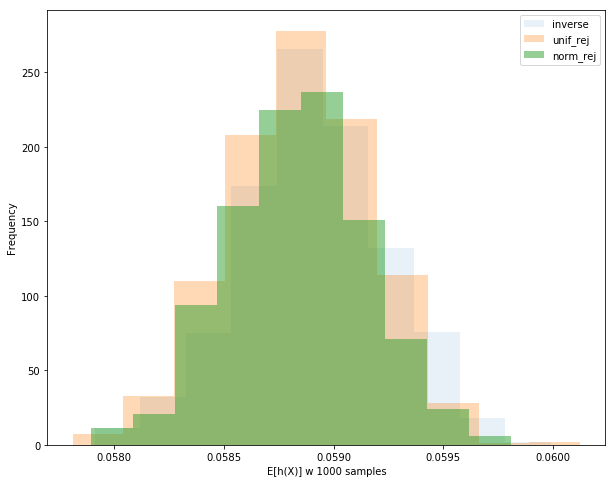

In [99]:
plt.figure(figsize=(10,8))
plt.hist(integral_inverse,bins=10,histtype='stepfilled',label='inverse',alpha=0.1)
plt.hist(integral_rej_unif,bins=10,histtype='stepfilled',label='unif_rej',alpha=0.3)
plt.hist(integral_rej_norm,bins=10,histtype='stepfilled',label='norm_rej',alpha=0.5)
plt.xlabel('E[h(X)] w 1000 samples')
plt.ylabel('Frequency')
plt.legend()


In [106]:
print('The variance of Inverse sampling = %s' %(np.var(integral_inverse)))
print('The variance of Rejection (Uniform) sampling = %s' %(np.var(integral_rej_unif)))
print('The variance of Rejection (Normal) sampling = %s' %(np.var(integral_rej_norm)))

The variance of Inverse sampling = 1.08440611294e-07
The variance of Rejection (Uniform) sampling = 1.06441326978e-07
The variance of Rejection (Normal) sampling = 9.94776956873e-08


We can see that the variance of these methods are quite similar. The inverse sampling and uniform rejection yielding similar results with normal sampling generating slightly lower variance. However, in previous implementations most of these values were quite similar.

#### Part B

It seems logical to do a stratification of 2 regions (although this might not be ideal if h varies a lot in one of the regions). However, to make life easy lets place 2 gaussians over f. WE have to estimate the mu's/sigma's of these which we will tweak with so that we can minimize M. We also want to do weighting, this means we can use the code provided by Rahul in lab to do this (e.g. we want to know how many samples should go into each strata).

In [107]:
# FINDING M's
# visual estimates
mu = [3,7]
sigma = [1,1]

# finding M
from scipy.stats import norm

xmin = 1
xmax = 9
step = 4
regions = 2
# integrals of the pdf in the specified strata
pj = [1/3,2/3]
M = np.zeros(regions)
for reg in range(regions):
    xvals = np.linspace(xmin,xmin+step,1000)
    mvals = []
    for i in range(len(xvals)):
        fvals=((1/pj[reg])*pdf(xvals[i]))
        gvals=(norm.pdf(xvals[i],mu[reg],sigma[reg]))
        mvals.append(fvals/gvals)
    M[reg] = max(mvals)
    xmin= xmin+step
print(M)

[ 1.25206208  1.25206208]


Now using these M's we plot the gaussians over the normalized pdfs in each strata

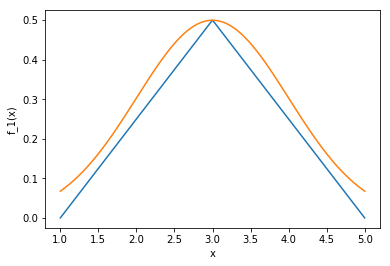

In [111]:
plt.figure()
xvals = np.linspace(1,5,1000)
pvar =[]
m1 = []
for i in range(len(xvals)):
    pvar.append(3*pdf(xvals[i]))
    m1.append(M[0]*norm.pdf(xvals[i],mu[0],sigma[0]))
plt.plot(xvals,pvar)
plt.xlabel('x')
plt.ylabel('f_1(x)')
plt.plot(xvals,m1)


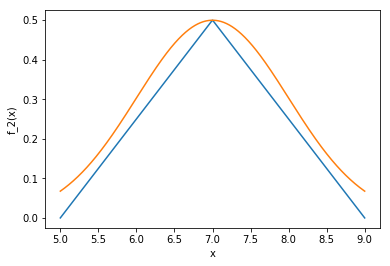

In [112]:
plt.figure()
xvals = np.linspace(5,9,1000)
pvar =[]
m1 = []
for i in range(len(xvals)):
    pvar.append(3*pdf(xvals[i])/2)
    m1.append(M[1]*norm.pdf(xvals[i],mu[1],sigma[1]))
plt.plot(xvals,pvar)
plt.xlabel('x')
plt.ylabel('f_2(x)')
plt.plot(xvals,m1)

Now we have our M values, we want estimates for how many data points we want in each strata. Since we don't know the variance of H, we can sample it using a uniform over our domain of interest as illustrated in lab.

In [113]:

# find data split
Ns = 2
N=1000
xmin =1
xmax = 9
Ntry=1000
sigmas = np.zeros(Ns)
Utry = np.random.uniform(low=xmin, high=xmax, size=Ntry)
step=4
Umin = 1 
Umax = 5
pj = [1/3,2/3]
rg1=[]
rg2=[]

for i in range(len(Utry)):
    if 1<= Utry[i]<5:
        rg1.append(Utry[i])
    else:
        rg2.append(Utry[i])

for reg in np.arange(0,Ns):
    vals = []
    if reg == 0:
        for i in range(len(rg1)):
            vals.append(h(rg1[i]))
    else:
        for i in range(len(rg2)):
            vals.append(h(rg2[i]))
    sigmas[reg] = np.std(vals)
    Umin = Umin + step
    Umax = Umax + step
nums = np.zeros(2)
nums[0]=np.ceil(N*sigmas[0]*pj[0]/(sigmas[0]*pj[0]+sigmas[1]*pj[1])).astype(int)
nums[1]=np.ceil(N*sigmas[1]*pj[1]/(sigmas[0]*pj[0]+sigmas[1]*pj[1])).astype(int)
nums = nums.astype(int)
print(nums)

[335 666]


Now we have all the ingredients needed to sample!

In [114]:
# adapted from Rahul on wiki stratification page
N = 1000
Ns = 2   # number of strata 
xmin=1
xmax =9
step = (xmax - xmin)/Ns
Umax = 9
Umin = 1
Is = np.zeros(N)
for k in np.arange(0,N):
    #stratified it in Ns regions
    step = 4
    Umin = 1 
    Umax = 1+step
    Ii = 0
    for reg in np.arange(0,Ns):
        # rejection sampling
        N = nums[reg] # the total of samples we wish to generate
        accepted = 0 # the number of accepted samples
        samples = np.zeros(N)
        count = 0 # the total count of proposals
        # generation loop
        while (accepted < N):
            # Sample from g using inverse sampling
            xproposal = np.random.normal(mu[reg],sigma[reg])
            # pick a uniform number on [0, 1)
            y = np.random.uniform(0,1)
            # Do the accept/reject comparison
            if (y < (1/pj[reg])*pdf(xproposal)/(M[reg]*(norm.pdf(xproposal,mu[reg],sigma[reg])))) and (Umin<=xproposal<Umax):
                samples[accepted] = xproposal
                accepted += 1
        Ii = Ii+(pj[reg])*np.sum(h(samples))/N
        Umin = Umin + step
        Umax = Umax + step

    Is[k] = Ii


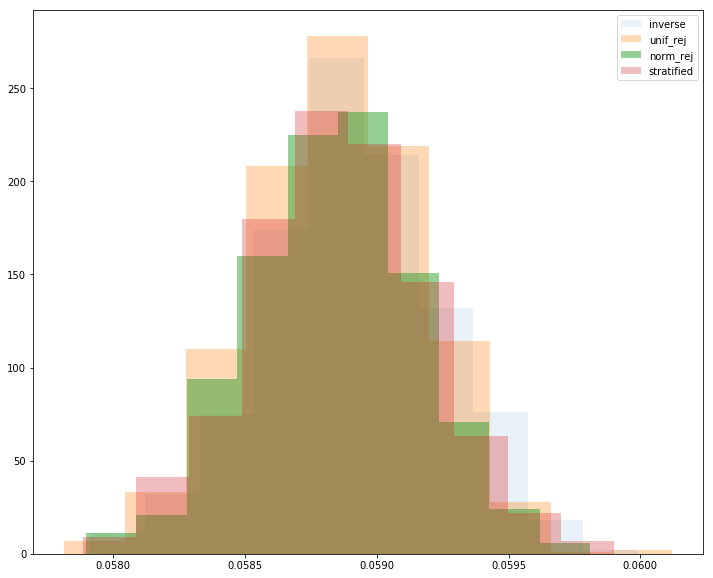

In [115]:
plt.figure(figsize=(12,10))
plt.hist(integral_inverse,bins=10,histtype='stepfilled',label='inverse',alpha=0.1)
plt.hist(integral_rej_unif,bins=10,histtype='stepfilled',label='unif_rej',alpha=0.3)
plt.hist(integral_rej_norm,bins=10,histtype='stepfilled',label='norm_rej',alpha=0.5)
plt.hist(Is,bins=10,histtype='stepfilled',label='stratified',alpha=0.3)
plt.legend()


In [116]:
print('The variance of stratified sampling = %s' %(np.var(Is)))

The variance of stratified sampling = 1.09234249538e-07


So it looks like we really aren't getting any benefit from stratifying this way :(. However, as Patrick suggested in OH, the benefit of stratification comes from actually splitting into strata! So, I choose to split the problem into 4 strata and sample accordingly.

# Lets try 4 strata

In [118]:
# FINDING M's
# visual estimates
mu = [3,3,7,7]
sigma = [1,1,1,1]

# finding M
from scipy.stats import norm

xmin = 1
xmax = 9
step = 2
regions = 4
# integrals of the pdf in the specified strata
pj = [1/6,1/6,1/3,1/3]
M = np.zeros(regions)
for reg in range(regions):
    xvals = np.linspace(xmin,xmin+step,1000)
    mvals = []
    for i in range(len(xvals)):
        fvals=((1/pj[reg])*pdf(xvals[i]))
        gvals=(norm.pdf(xvals[i],mu[reg],sigma[reg]))
        mvals.append(fvals/gvals)
    M[reg] = max(mvals)
    xmin= xmin+step
print(M)

[ 2.50662827  2.50662827  2.50662827  2.50662827]


M's above are all the same from symmetry'

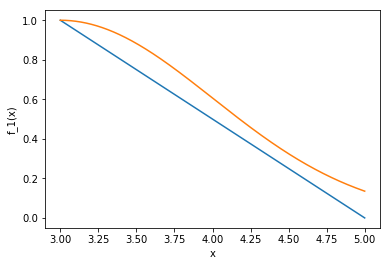

In [120]:
plt.figure()
xvals = np.linspace(3,5,1000)
pvar =[]
m1 = []
for i in range(len(xvals)):
    pvar.append(6*pdf(xvals[i]))
    m1.append(M[1]*norm.pdf(xvals[i],mu[0],sigma[0]))
plt.plot(xvals,pvar)
plt.xlabel('x')
plt.ylabel('f_1(x)')
plt.plot(xvals,m1)


Showing a plot of one of the gaussians in the second strata

In [126]:

# find data split
Ns = 4
N=1000
xmin =1
xmax = 9
Ntry=1000
sigmas = np.zeros(Ns)
Utry = np.random.uniform(low=xmin, high=xmax, size=Ntry)
step=2
Umin = 1 
Umax = 3
rg1=[]
rg2=[]
rg3 =[]
rg4 =[]
for i in range(len(Utry)):
    if 1<= Utry[i]<3:
        rg1.append(Utry[i])
    elif 3<= Utry[i]<5:
        rg2.append(Utry[i])
    elif 5<= Utry[i]<7:
        rg3.append(Utry[i])
    else:
        rg4.append(Utry[i])
rg1 = np.array(rg1)
rg2 = np.array(rg2)
rg3 = np.array(rg3)
rg4 = np.array(rg4)

sigmas[0] = np.std(h(rg1))
sigmas[1] = np.std(h(rg2))
sigmas[2] = np.std(h(rg3))
sigmas[3] = np.std(h(rg4))

nums = np.zeros(4)
for i in range(len(nums)):
    nums[i]=np.ceil(N*sigmas[i]*pj[i]/(np.dot(sigmas,pj))).astype(int)

    nums = nums.astype(int)
print(nums)

[223 116 221 442]


Numbers illustrating samples required in each region based on the function H

In [127]:
# 4strata!
N = 1000
Ns = 4   # number of strata 
xmin=1
xmax =9
step = (xmax - xmin)/Ns
Umax = 9
Umin = 1
Is = np.zeros(N)
for k in np.arange(0,N):
    #stratified it in Ns regions
    Umin = 1 
    Umax = 1+step
    Ii = 0
    for reg in np.arange(0,Ns):
        # rejection sampling
        N = nums[reg] # the total of samples we wish to generate
        accepted = 0 # the number of accepted samples
        samples = np.zeros(N)
        count = 0 # the total count of proposals
        # generation loop
        while (accepted < N):
            # Sample from g using inverse sampling
            xproposal = np.random.normal(mu[reg],sigma[reg])
            # pick a uniform number on [0, 1)
            y = np.random.uniform(0,1)
            # Do the accept/reject comparison
            if (y < (1/pj[reg])*pdf(xproposal)/(M[reg]*(norm.pdf(xproposal,mu[reg],sigma[reg])))) and (Umin<=xproposal<Umax):
                samples[accepted] = xproposal
                accepted += 1
        Ii = Ii+(pj[reg])*np.sum(h(samples))/N
        Umin = Umin + step
        Umax = Umax + step

    Is[k] = Ii


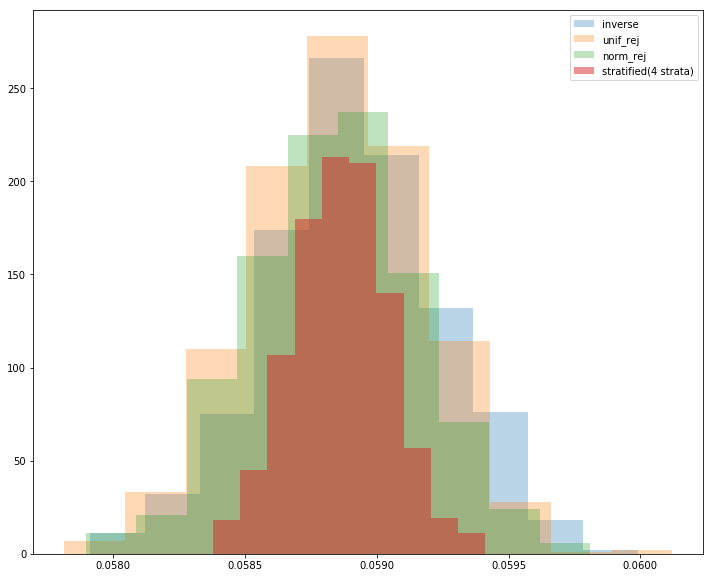

In [131]:
plt.figure(figsize=(12,10))
plt.hist(integral_inverse,bins=10,histtype='stepfilled',label='inverse',alpha=0.3)
plt.hist(integral_rej_unif,bins=10,histtype='stepfilled',label='unif_rej',alpha=0.3)
plt.hist(integral_rej_norm,bins=10,histtype='stepfilled',label='norm_rej',alpha=0.3)
plt.hist(Is,bins=10,histtype='stepfilled',label='stratified(4 strata)',alpha=0.5)
plt.legend()


In [129]:
print('The variance of stratified sampling (4 strata) = %s' %(np.var(Is)))

The variance of stratified sampling (4 strata) = 3.33707220302e-08


#### Conclusion

We have seen multiple ways to sample from a distribution and predict an expectation of H over the distribution. Through increasing the strata we can see that we get reduced variance in the integral over the replication dimension. We expected this from the proof presented in class. However, we expected something similar with 2 strata but didn't see any improvement, perhaps this is due to the fact that 2 strata isn't enough and that the uniform over the entire space captures more data where it is needed.

## Problem 3: Linear Regression

Consider the following base Regression class, which roughly follows the API in the python package `scikit-learn`.

Our model is the the multivariate linear model whose MLE solution or equivalent cost minimization was talked about in lecture:

$$y = X\beta + \epsilon$$
where $y$ is a length $n$ vector, $X$ is an $m \times p$ matrix created by stacking the features for each data point, and $\beta$ is a $p$ length vector of coefficients.

The class showcases the API:

$fit(X, y)$: Fits linear model to $X$ and $y$.

$get\_params()$: Returns $\hat{\beta}$ for the fitted model. The parameters should be stored in a dictionary with keys "intercept" and "coef" that give us $\hat{\beta_0}$ and $\hat{\beta_{1:}}$. (The second value here is thus a numpy array of coefficient values)

$predict(X)$: Predict new values with the fitted model given $X$.

$score(X, y)$: Returns $R^2$ value of the fitted model.

$set\_params()$: Manually set the parameters of the linear model.



In [1]:
class Regression(object):
    
    def __init__(self):
        self.params = dict()
    
    def get_params(self, k):
        return self.params[k]
    
    def set_params(self, **kwargs):
        for k,v in kwargs.iteritems():
            self.params[k] = v
        
    def fit(self, X, y):
    def predict(self, X):
        raise NotImplementedError()
        
    def score(self, X, y):
        raise NotImplementedError()

### Part A:  a class for Ordinary Least Squares

Inherit from this class to create an ordinary Least Squares Linear Regression class. 

It's signature will look like this:

`class OLS(Regression):`

Implement `fit`, `predict` and `score`. This will involve some linear algebra. (You might want to read up on pseudo-inverses before you directly implement the linear algebra on the lecure slides).

#### $R^2$ score

To implement `score`, look below:

The $R^2$ score is defined as: $${R^{2} = {1-{SS_E \over SS_T}}}$$

Where:

$$SS_T=\sum_i (y_i-\bar{y})^2, SS_R=\sum_i (\hat{y_i}-\bar{y})^2, SS_E=\sum_i (y_i - \hat{y_i})^2$$
where  ${y_i}$ are the original data values, $\hat{y_i}$ are the predicted values, and $\bar{y_i}$ is the mean of the original data values.



In [136]:
class OLS(object):
    
    def __init__(self):
        self.params = dict()
    
    def get_params(self, k):
        return self.params[k]
    
    def set_params(self, **kwargs):
        for k,v in kwargs.items():
            self.params[k] = v
        
    def fit(self, X, y):
        # warn those who have no bias term
        if np.sum(np.insert(X,0,1,axis=1)[:,0] == 1) != X.shape[0]:
            print('Warning: Fitting X without bias. Use np.insert to add bias term')
        # do linalgebra
        cs = np.dot(np.linalg.pinv(np.dot(X.T,X)),np.dot(X.T,y))
        # set coefficients to all terms except bias term
        self.params['coef'] = cs[1:]
        self.params['intercept'] = cs[0]
        self.coef_ = cs
        return self
    
    def predict(self, X):
        return np.dot(X,self.coef_)
    
    def score(self, X, y):
        sse = np.sum((self.predict(X)-y)**2)
        sst = np.sum((self.predict(X)-np.mean(y))**2)
        return 1-sse/sst

### Part B: test your code

We'll create a synthetic data set using the code below. (Read the documentation for `make_regression` to see what is going on).

In [137]:
from sklearn.datasets import make_regression
import numpy as np
np.random.seed(99)
X, y, coef = make_regression(30,10, 10, bias=1, noise=2, coef=True)
coef

array([ 76.6568183 ,  77.67682678,  63.78807738,  19.3299907 ,
        59.01638708,  53.13633737,  28.77629958,  10.01888939,
         9.25346811,  59.55220395])

Verify that your code recovers these coefficients approximately on doing the fit. Plot the predicted `y` against the actual `y`. Also calculate the score using the same sets `X` and `y`. The usage will look something like:

```python
lr = OLS()
lr.fit(X,y)
lr.get_params['coef']
lr.redict(X,y)
lr.score(X,y)
```

In [138]:
lr = OLS()

In [139]:
lr.fit(np.insert(X,0,1,axis=1),y)

In [140]:
lr.predict(np.insert(X,0,1,axis=1))

array([  48.57564537,   24.85508406,  246.39920911,   64.72282184,
        124.00042911, -266.57653702,  118.15510334, -108.57077603,
        191.15229644,  174.74404249, -103.59066227,  -59.1576374 ,
        -54.70947468,   73.91003582,  505.22781806,   39.53820436,
       -191.02175593, -201.71787963,   46.1500923 , -111.90307749,
        117.38777883, -111.52335297,   41.66543625,  168.33074858,
         73.41934029,  -80.64319083,  155.12182695,  -94.18157131,
        -48.17239883,   40.78548557])

In [141]:
lr.score(np.insert(X,0,1,axis=1),y)

0.99991557607942272

In [143]:
lr.get_params('coef')

array([ 77.20719705,  76.51004831,  62.97865316,  18.4436452 ,
        58.50019885,  53.25126559,  28.29088241,   9.33333359,
        10.29584457,  59.1606719 ])

In [145]:
lr.get_params('intercept')

1.3458035707838008

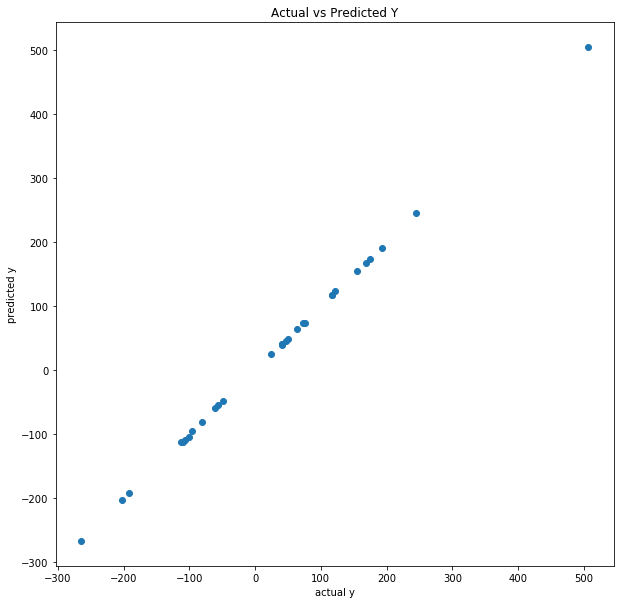

In [146]:
plt.figure(figsize=(10,10))
plt.scatter(y,lr.predict(np.insert(X,0,1,axis=1)))
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.title('Actual vs Predicted Y')